In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def label_data(df):
    peaks, _ = find_peaks(df['Fz'])
    if len(peaks) > 1:
        sorted_peak_indexes = np.argsort(df['Fz'][peaks])[::-1]  # sort in descending order
        first_peak = peaks[sorted_peak_indexes.iloc[0]]
        peaks2,_ = find_peaks(df["Fz"][:first_peak - 500])
        sorted_peak_indexes2 = np.argsort(df['Fz'][peaks2])[::-1]
        second_highest_peak_index = peaks2[sorted_peak_indexes2.iloc[0]]  # get the index of the second highest peak
        df['label'] = np.where(df['Fz'] >= df['Fz'][second_highest_peak_index],'fail', 'pass')
        # dfs2.append(df.iloc[second_highest_peak_index - 500:first_peak+200])
        # print(df)
        return df
        print(df.loc[df['label'] == 'fail', 'Fz'])
    else:
        df['label'] = "pass"
        return df
        # dfs2.append(df)

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# # Load the data from CSV files
# df1 = pd.read_csv("data1.csv")
# df2 = pd.read_csv("data2.csv")
# df3 = pd.read_csv("data3.csv")
# # Repeat for all 28 data files and concatenate them into a single data frame
# df = pd.concat([df1, df2, df3], axis=1)


import os

# Set the path to the csv_data folder
folder_path = '/content/drive/MyDrive/csv_data/csv_75000'

# Load the file names of all CSV files in the folder
filenames = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

#Creating a list of data-frames
dfs = []
for f in filenames:
    df = pd.read_csv(f)
    dfs.append(df)
# Find the second highest peak in each dataframe and label it as fail
# dfs2=[]
for df in dfs:
    peaks, _ = find_peaks(df['Fz'])
    if len(peaks) > 1:
        sorted_peak_indexes = np.argsort(df['Fz'][peaks])[::-1]  # sort in descending order
        first_peak = peaks[sorted_peak_indexes.iloc[0]]
        peaks2,_ = find_peaks(df["Fz"][:first_peak - 500])
        sorted_peak_indexes2 = np.argsort(df['Fz'][peaks2])[::-1]
        second_highest_peak_index = peaks2[sorted_peak_indexes2.iloc[0]]  # get the index of the second highest peak
        df['label'] = np.where(df['Fz'] >= df['Fz'][second_highest_peak_index],'fail', 'pass')
        # dfs2.append(df.iloc[second_highest_peak_index:first_peak])
        # print(df)
        # print(df.loc[df['label'] == 'fail', 'Fz'])
    else:
        df['label'] = "pass"
        # dfs2.append(df)


# Repeat for all 28 data files and concatenate them into a single data frame
df = pd.concat(dfs, ignore_index=True)
# print(df)
# Split the data into training and validation sets
# Get all columns except the last one (force)
X = df[["Time","Fz"]]
y = df["label"] # Get the last column (label)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an oversampler object
oversampler = RandomOverSampler()

# Fit and apply the oversampling to the training data
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# print(X_train)
# Get the feature names
feature_names = X_train.index

# Create an SVM regression model
svc = SVC(kernel="linear", C=10)

# Train the SVM model on the training data
# svc.fit(X_resampled, y_resampled)
svc.fit(X_train,y_train) #for 50,75


SVC(C=10, kernel='linear')

In [ ]:
import joblib
# Save the model
joblib.dump(svc, '/content/drive/MyDrive/csv_data/models/svc75.pkl')

['/content/drive/MyDrive/csv_data/models/svc75.pkl']

In [ ]:
import joblib
svc = joblib.load('/content/drive/MyDrive/csv_data/models/svc75.pkl')

In [ ]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

        fail       0.91      0.73      0.81        86
        pass       1.00      1.00      1.00     10915

    accuracy                           1.00     11001
   macro avg       0.96      0.87      0.91     11001
weighted avg       1.00      1.00      1.00     11001



In [ ]:
X_valp=X_val.copy()
X_valp['label-p']=y_pred
X_valp['label']=y_val

In [ ]:
X_valp

,Time,Fz,label-p,label
46755,0.7004,0.187465,pass,pass
45724,0.2880,0.104632,pass,pass
38770,1.5068,-0.178746,pass,pass
35239,0.0944,0.047956,pass,pass
12423,0.9688,-0.058855,pass,pass
...,...,...,...,...
23556,1.4216,-0.056675,pass,pass
25455,2.1812,0.108991,pass,pass
38872,1.5476,-0.026158,pass,pass
49174,1.6680,0.061035,pass,pass


In [ ]:
# sort the DataFrame by index in ascending order
Xvalp_sorted = X_valp.sort_index(ascending=True)

# print the sorted DataFrame
print(Xvalp_sorted)

         Time        Fz label-p label
4      0.0016  0.050136    pass  pass
6      0.0024 -0.095912    pass  pass
31     0.0124 -0.010899    pass  pass
34     0.0136  0.047956    pass  pass
38     0.0152  0.093733    pass  pass
...       ...       ...     ...   ...
54970  3.9864  0.006539    pass  pass
54978  3.9896 -0.113351    pass  pass
54993  3.9956 -0.080654    pass  pass
54995  3.9964  0.054496    pass  pass
54998  3.9976 -0.098092    pass  pass

[11001 rows x 4 columns]


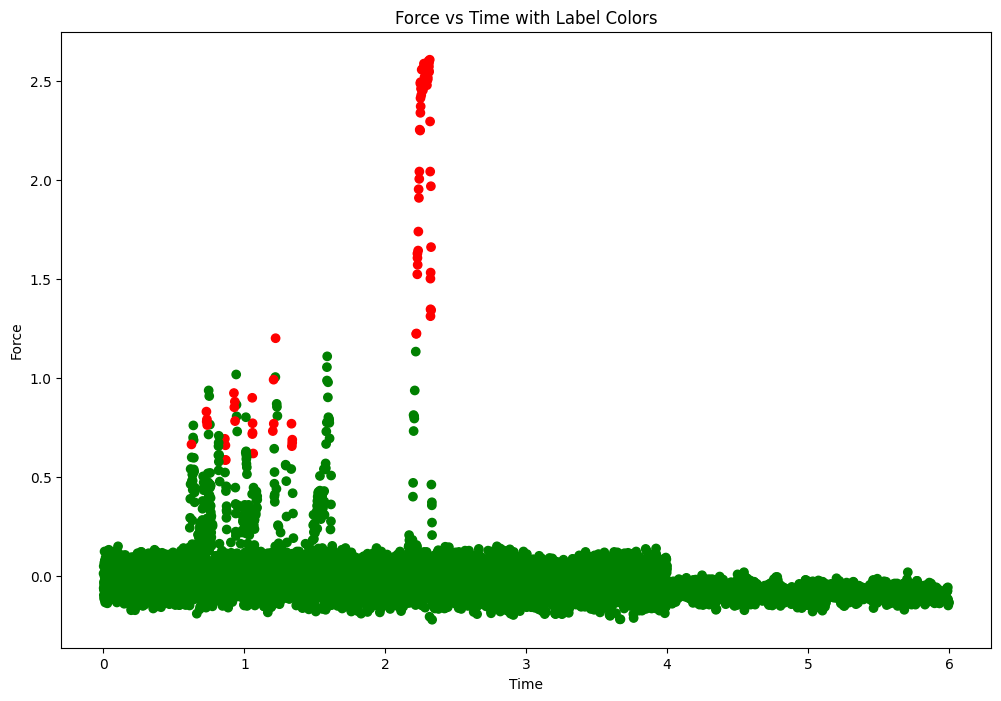

In [ ]:
import matplotlib.pyplot as plt
df = Xvalp_sorted
# create a color map
cmap = {'pass': 'green', 'fail': 'red'}

# map the labels to colors
colors = df['label'].map(cmap)

# create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# plot the scatter plot with colors
ax.scatter(df['Time'], df['Fz'], c=colors)

# add axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Force')
ax.set_title('Force vs Time with Label Colors')

# show the plot
plt.show()

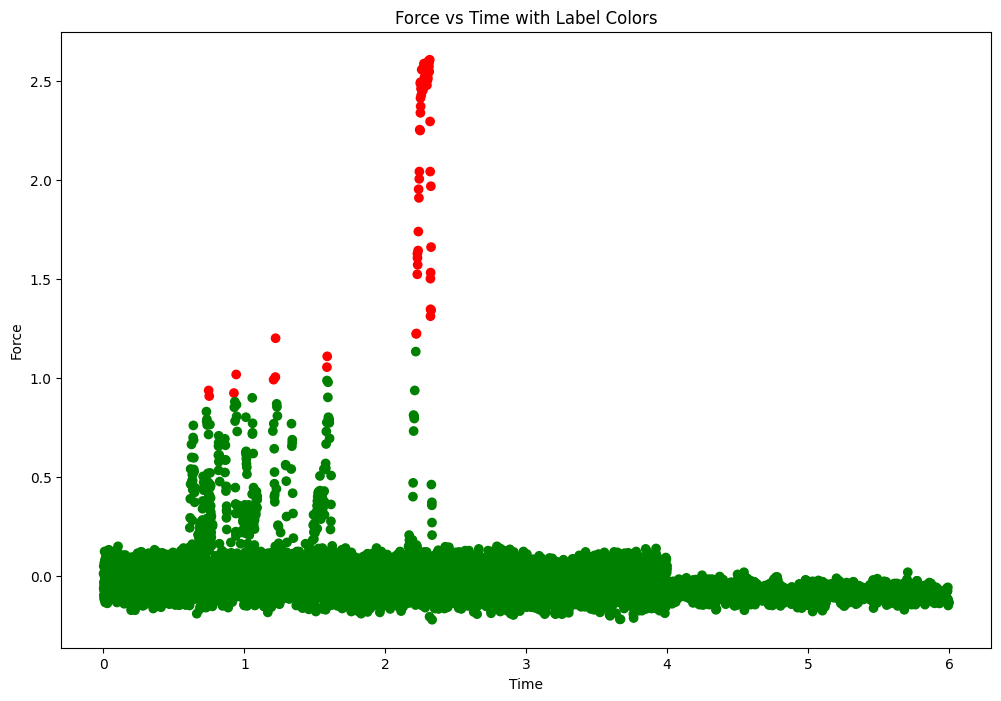

In [ ]:
import matplotlib.pyplot as plt
df = Xvalp_sorted
# create a color map
cmap = {'pass': 'green', 'fail': 'red'}

# map the labels to colors
colors = df['label-p'].map(cmap)

# create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# plot the scatter plot with colors
ax.scatter(df['Time'], df['Fz'], c=colors)

# add axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Force')
ax.set_title('Force vs Time with Label Colors')

# show the plot
plt.show()


In [ ]:
t_df = pd.read_csv("/content/drive/MyDrive/csv_data/csv_75000/f1_75000_001 - f1_75000_001.csv")
X_test = t_df[["Time","Fz"]]
pred = svc.predict(X_test)
X_test['label-p']=pred

<ipython-input-430-498101e52b0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['label-p']=pred


In [ ]:
label_data(X_test)

<ipython-input-62-e10430b40d01>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = np.where(df['Fz'] >= df['Fz'][second_highest_peak_index],'fail', 'pass')


,Time,Fz,label-p,label
0,0.0000,0.050136,pass,pass
1,0.0004,0.013079,pass,pass
2,0.0008,-0.026158,pass,pass
3,0.0012,-0.052316,pass,pass
4,0.0016,0.006539,pass,pass
...,...,...,...,...
14996,5.9984,-0.141689,pass,pass
14997,5.9988,-0.095912,pass,pass
14998,5.9992,-0.065395,pass,pass
14999,5.9996,-0.089373,pass,pass


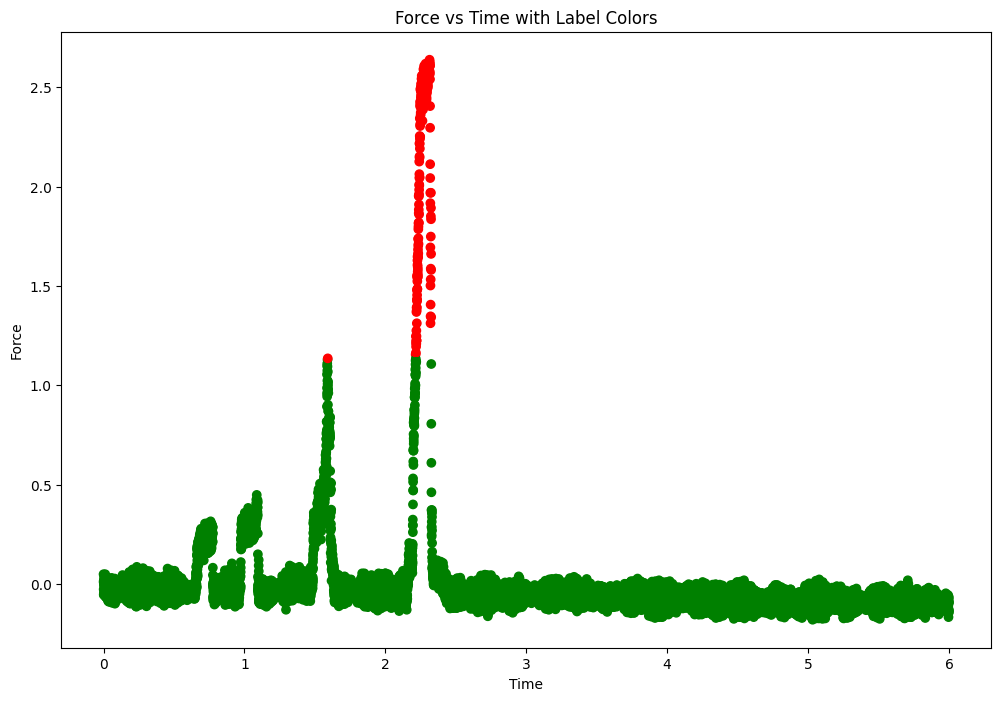

In [ ]:
import matplotlib.pyplot as plt
df = X_test
# create a color map
cmap = {'pass': 'green', 'fail': 'red'}

# map the labels to colors
colors = df['label'].map(cmap)

# create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# plot the scatter plot with colors
ax.scatter(df['Time'], df['Fz'], c=colors)

# add axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Force')
ax.set_title('Force vs Time with Label Colors')

# show the plot
plt.show()

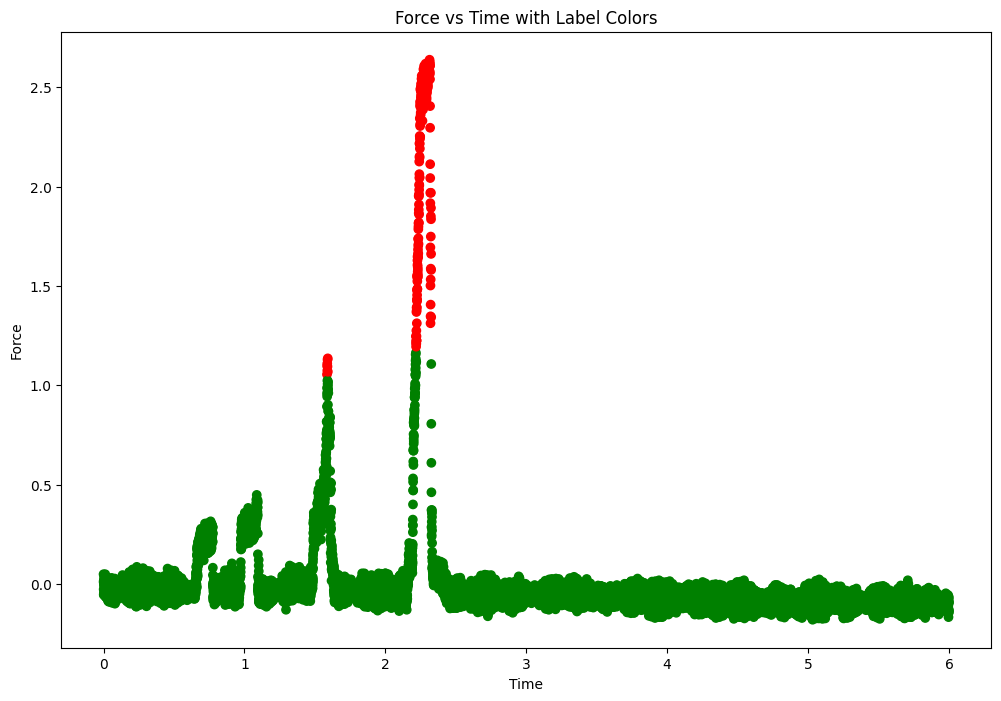

In [ ]:
import matplotlib.pyplot as plt
df = X_test
# create a color map
cmap = {'pass': 'green', 'fail': 'red'}

# map the labels to colors
colors = df['label-p'].map(cmap)

# create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# plot the scatter plot with colors
ax.scatter(df['Time'], df['Fz'], c=colors)

# add axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Force')
ax.set_title('Force vs Time with Label Colors')

# show the plot
plt.show()
